# The Curse of Dimensionality

## Example 1: $P(x)$ of $x$ being at the border of a unit square

Pick a random point in a unit square (1 x 1). It will have 0.4% chance of being located less than 0.001 from the border.

Let's make a simulation of this scenario:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
def throw_point():
    
    def draw_squares(border=0.1):
        sqr = mpl.patches.Rectangle((0,0),1,1)
        ax.add_patch(sqr)
        border = border
        sqr_2 = mpl.patches.Rectangle((0+border,0+border),1-border*2,1-border*2, color='w')
        ax.add_patch(sqr_2)

    # random point (x, y):
    x, y = np.random.rand(2)

    fig, ax = plt.subplots(figsize=(7,7))
    draw_squares(0.01)
    ax.plot([x],[y], c='r',marker='x', markersize=12)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.show()

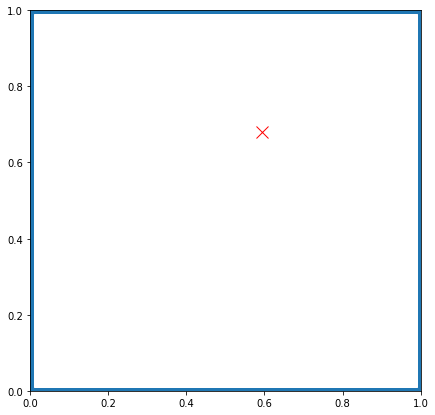

In [7]:
throw_point()

The probability of the random point $x$ to land in the blue zone is:

In [8]:
mat = np.zeros((1000,1000))
mat[1:-1,1:-1] = 1  # border values are 0 

In [9]:
def simulate(n=10000, mat=mat):
    count = 0
    border_points = 0

    while count < n:    
        sample = np.random.choice(mat.flat)
        if sample == 0:
            border_points +=1
        count += 1

    print(f'probabilty of point in border: {border_points/count}')

In [14]:
mat3d = np.zeros((1000,1000, 1000), dtype=np.uint8)
mat3d[1:-1,1:-1, 1:-1] = 1  # left border with 0 

In [15]:
simulate(100000, mat3d)

probabilty of point in border: 0.00591


In [16]:
1 - 0.13506

0.86494